In [1]:
import tensorflow as tf
import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
x_train.dtype, y_train.dtype

(dtype('uint8'), dtype('uint8'))

In [5]:
y_train[0]

np.uint8(9)

# 1. Visualize

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Ankle boot'

In [46]:
from typing import Optional
def plot_data(x_data: np.ndarray, y_data: np.ndarray, y_proba: Optional[np.ndarray]=None) -> None:
    nrows, ncols = 2, 4
    fig, axes = plt.subplots(nrows, ncols, figsize=(8,4))
    for i in range(ncols*nrows):
        ax = axes[i//ncols, i%ncols]
        img_idx = np.random.randint(0, x_data.shape[0])
        ax.imshow(x_data[img_idx], cmap="gray")
        ax.set(xticks=[], yticks=[])
        color = "green"
        true_label_str = f"True: {class_names[y_data[img_idx]]}"
        if y_proba is not None:
            predicted_idx = np.argmax(y_proba[img_idx])
            predicted_label = class_names[predicted_idx]
            color = "gray" if predicted_idx != y_data[img_idx] else color
            predicted_label_str = f"\nPredicted: {predicted_label}"
        img_title = true_label_str if y_proba is None else true_label_str + predicted_label_str
        ax.set_xlabel(img_title, color = color)
    plt.tight_layout()
    plt.show()

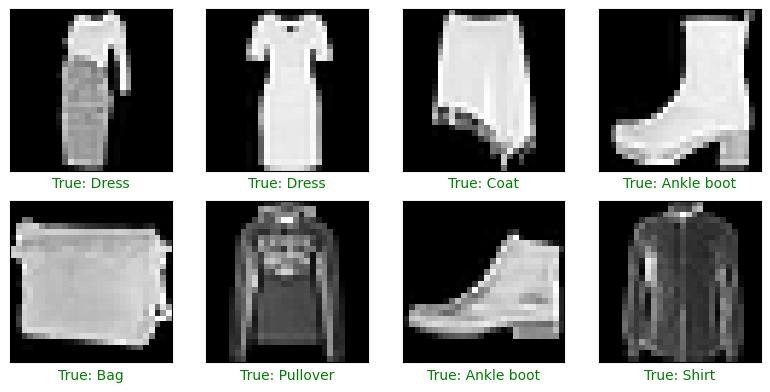

In [36]:
plot_data(x_train, y_train)

# 2. Image Pre-processing

In [9]:
# Convert to float32 and scale images to the [0, 1] range for training
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

In [10]:
x_test.shape, x_test.dtype

((10000, 28, 28), dtype('float32'))

In [11]:
# Make sure images have shape (6000, 28, 28) => (6000, 28, 28, 1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [12]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [13]:
# convert class vectors to binary class matrices: 1 => [0 1 0 0 ..]
y_train_label = keras.utils.to_categorical(y_train, len(class_names))
y_test_label = keras.utils.to_categorical(y_test, len(class_names))

In [14]:
y_train[0], y_train_label[0]

(np.uint8(9), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))

# 3. Network (ANN) Architecture

In [15]:
input_shape = (28,28,1)

In [16]:
model = keras.models.Sequential([
    keras.Input(shape=input_shape),   
    layers.Flatten(),  # (28,28,1) -> (784,)
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [18]:
epochs = 10
batch_size = 128
history = model.fit(x_train, y_train_label,
         epochs=epochs,
         batch_size=batch_size,
         validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7952 - loss: 0.5611 - val_accuracy: 0.8285 - val_loss: 0.4509
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8554 - loss: 0.3860 - val_accuracy: 0.8557 - val_loss: 0.3764
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8751 - loss: 0.3363 - val_accuracy: 0.8710 - val_loss: 0.3703
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8834 - loss: 0.3112 - val_accuracy: 0.8713 - val_loss: 0.3474
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8912 - loss: 0.2898 - val_accuracy: 0.8793 - val_loss: 0.3373
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8979 - loss: 0.2728 - val_accuracy: 0.8853 - val_loss: 0.3289
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9018 - loss: 0.2593 - val_accuracy: 0.8800 - val_loss: 0.3313
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9058 - loss: 0.2497 - val_a

In [19]:
history_dict = history.history

In [20]:
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [21]:
train_loss, val_loss = history_dict["loss"], history_dict['val_loss']
train_acc, val_acc = history_dict["accuracy"], history_dict['val_accuracy']

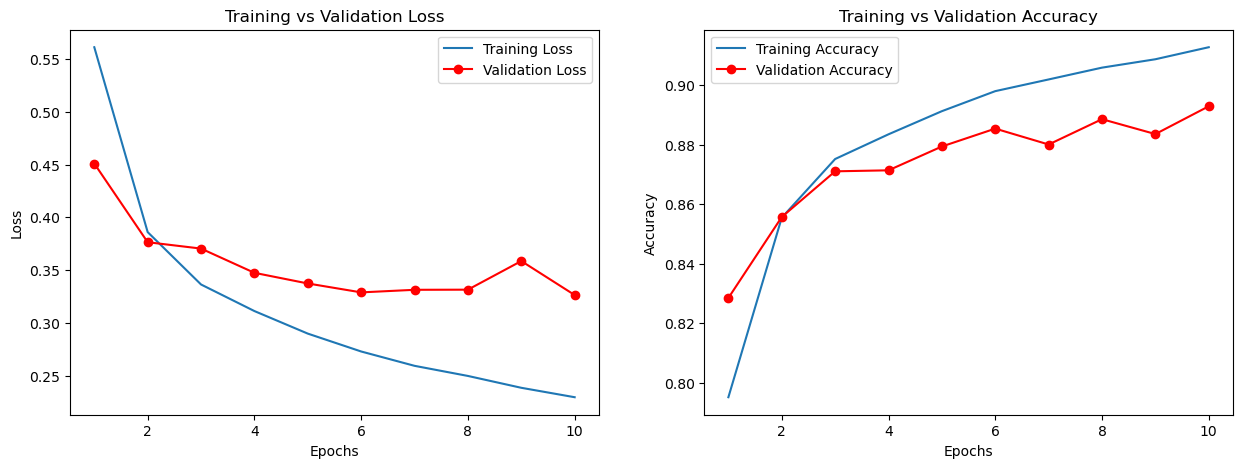

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
epoch_runs = [i + 1 for i in range(epochs)]

ax1.plot(epoch_runs, train_loss, label="Training Loss")
ax1.plot(epoch_runs, val_loss, label="Validation Loss", marker="o", color="r")
ax1.set(title="Training vs Validation Loss", xlabel="Epochs", ylabel="Loss")
ax1.legend();


ax2.plot(epoch_runs, train_acc, label="Training Accuracy")
ax2.plot(epoch_runs, val_acc, label="Validation Accuracy", marker="o", color="r")
ax2.set(title="Training vs Validation Accuracy", xlabel="Epochs", ylabel="Accuracy")
ax2.legend();

# 4. Model Evaluation

In [23]:
x_test.shape

(10000, 28, 28, 1)

In [24]:
model.summary()
score = model.evaluate(x_test, y_test_label)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,071,638 (4.09 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 535,820 (2.04 MB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8875 - loss: 0.3410


In [25]:
print(f"Lost: {score[0]:.4f}")
print(f"Accuracy: {score[1]:.4f}")

Lost: 0.3410
Accuracy: 0.8875


# 5. Prediction

In [26]:
x_sample = x_test[:3]
y_proba = model.predict(x_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


In [29]:
y_proba

array([[4.3723389e-10, 1.2817634e-08, 2.0059849e-09, 1.6612287e-09,
        3.1732525e-09, 5.0393132e-06, 3.9177664e-08, 1.3012057e-03,
        2.3110897e-10, 9.9869376e-01],
       [2.9296486e-06, 1.1519832e-18, 9.9997628e-01, 2.0989408e-12,
        1.9043664e-05, 2.0462422e-14, 1.8427753e-06, 5.8414971e-15,
        7.7734580e-16, 2.9318114e-14],
       [1.4205435e-16, 1.0000000e+00, 9.5154624e-23, 2.7019091e-13,
        5.7049106e-19, 1.4383362e-23, 5.4632088e-15, 3.0026472e-24,
        4.8346158e-23, 5.8018984e-25]], dtype=float32)

In [32]:
predictions = np.argmax(y_proba, axis=1)

In [33]:
predictions

array([9, 2, 1])

In [37]:
# Test toàn bộ bộ dataset test
y_proba = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


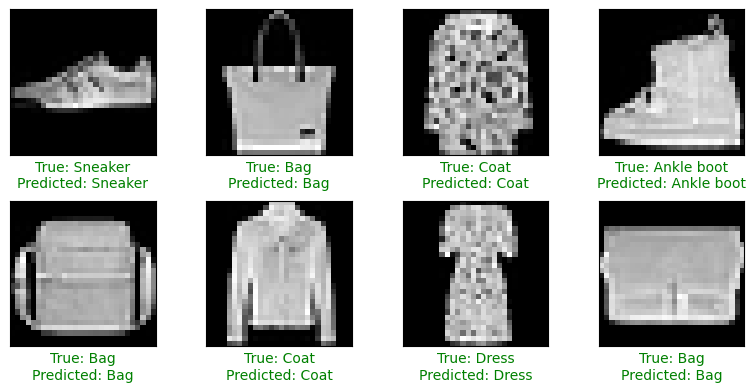

In [50]:
plot_data(x_test, y_test, y_proba)